In [1]:
import pandas as pd

In [2]:
dimensions = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'captal_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'income'
]

df = pd.read_csv('adult.data', header=None, names=dimensions)

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  captal_gain     32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captal_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Ordinal Encoding

In [6]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Define the correct ordinal order for education levels
education_levels = [
    ' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th',
    ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm',
    ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'
]

# Create the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_levels])

# Assume 'df' is your original DataFrame with an 'education' column
# Now we will apply the encoder to the 'education' column of your DataFrame
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])


One-Hot Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.drop(['education', 'income'])

onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded_data = onehot_encoder.fit_transform(df[categorical_columns])

onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=onehot_encoder.get_feature_names_out())

onehot_encoded_df.index = df.index

C:\Users\Obama\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
onehot_encoded_df

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Final Data

In [10]:
df_numerical_and_ordinal = df.drop(categorical_columns.to_list() + ['education'], axis=1)

final_df = pd.concat([df_numerical_and_ordinal, onehot_encoded_df], axis=1)

In [11]:
final_df

,age,fnlwgt,education_num,captal_gain,capital_loss,hours_per_week,income,education_encoded,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,154374,9,0,0,40,>50K,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,151910,9,0,0,40,<=50K,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,201490,9,0,0,20,<=50K,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
final_df.columns

Index(['age', 'fnlwgt', 'education_num', 'captal_gain', 'capital_loss',
       'hours_per_week', 'income', 'education_encoded',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', '

In [13]:
final_df['income'] = final_df['income'].map({' <=50K': 0, ' >50K': 1})

X = final_df.drop('income', axis=1)
y = final_df['income']

In [14]:
col = df.columns
y = final_df.income
x = final_df.drop('income', axis=1)

In [15]:
y.shape

(32561,)

In [16]:
x.shape

(32561, 86)

In [17]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [18]:
x

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266]])

In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Naive Bayes / GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.38724536800081893


Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8544375063977889


K-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8216808271061521


Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8121609171870202


Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8564847988535162


Comparing Model Performance with Cross-validation

LR: 0.850825 (0.001407)
KNN: 0.822525 (0.001203)
DTC: 0.812873 (0.002568)
RF: 0.854379 (0.004364)


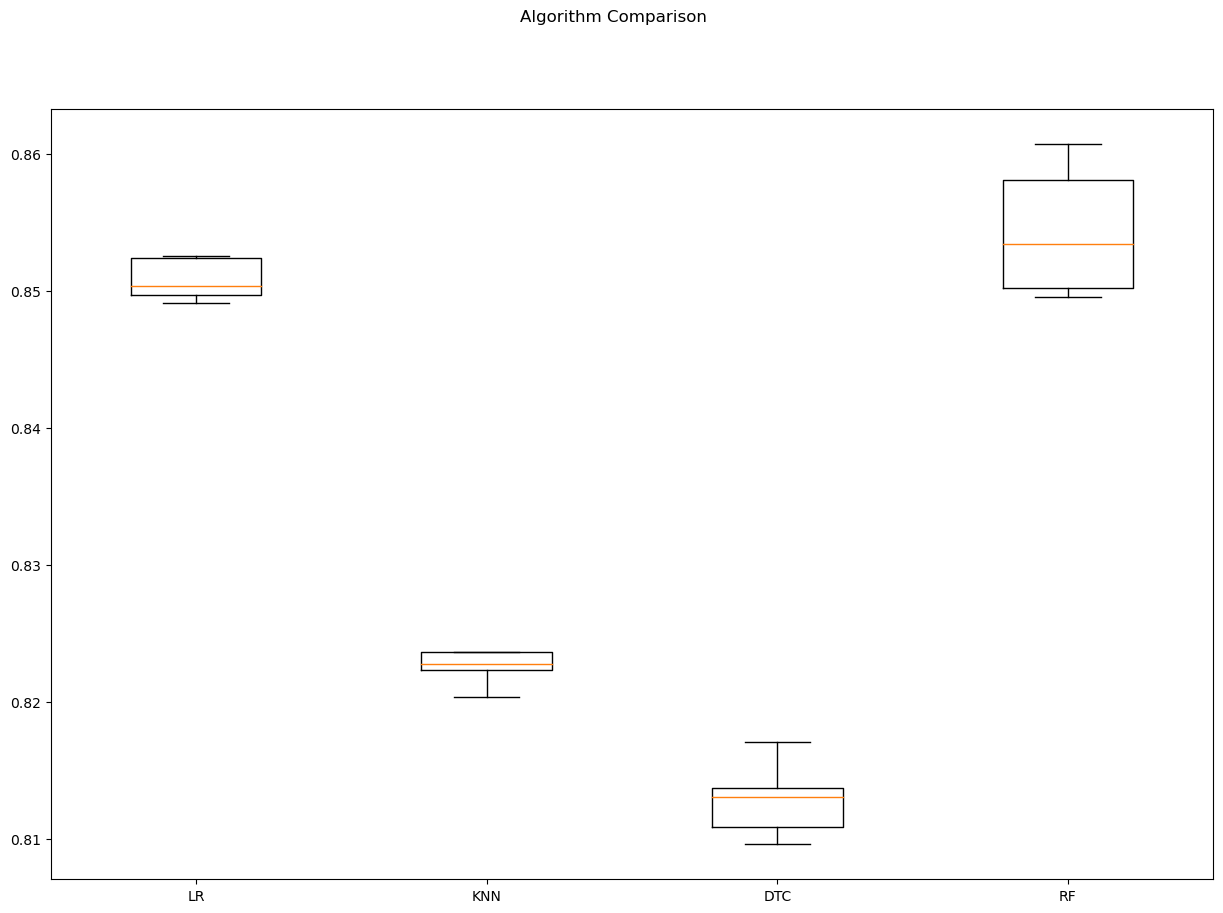

In [26]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The Best Classifier Model

In [27]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [02:24<00:04,  4.56s/it]

[LightGBM] [Info] Number of positive: 5527, number of negative: 17265
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 22792, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242497 -> initscore=-1.139036
[LightGBM] [Info] Start training from score -1.139036


100%|██████████| 29/29 [02:25<00:00,  5.01s/it]


In [28]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.78,0.81,0.81,0.80,0.12
XGBClassifier,0.87,0.80,0.80,0.87,0.36
LGBMClassifier,0.87,0.80,0.80,0.87,0.39
AdaBoostClassifier,0.87,0.78,0.78,0.86,1.85
BernoulliNB,0.81,0.78,0.78,0.82,0.13
RandomForestClassifier,0.86,0.78,0.78,0.85,4.34
LogisticRegression,0.85,0.77,0.77,0.85,0.23
CalibratedClassifierCV,0.86,0.77,0.77,0.85,3.51
LinearSVC,0.85,0.77,0.77,0.85,5.78
